# <span style="color:#573D1C"> ThemisAI QuickStart: Aleatoric Uncertainty (Label Noise)</span>

### <span style="color:#B8D8D8"> Capsa automatically wraps ML workflows to achieve risk-aware learning and deployment.</span>

In this demo, we'll be demonstrating how **CAPSA**, the risk awareness framework that we've developed at **Themis AI**, can be used to capture noise in the data: mislabeled datapoints, ambiguous labels, etc.

<span style="color:#B8D8D8">Note:</span> We will be utilizing CAPSA's **MVE Wrapper** metric. **CAPSA** provides several other metrics that we will not be using in this tutorial.

As an ML developer, you are interested in implementing a dynamic noise detection capabilities into your own model. You don't want to implement it yourself, you don't want complexity. And you're interested in simple tools that you can utilize.
**CAPSA** provides you with those vital, yet easy to use tools.

Warning: This notebook includes some functions from a helper python file. These function are used to hide away some of the usual workflow.   

<center>
<div>
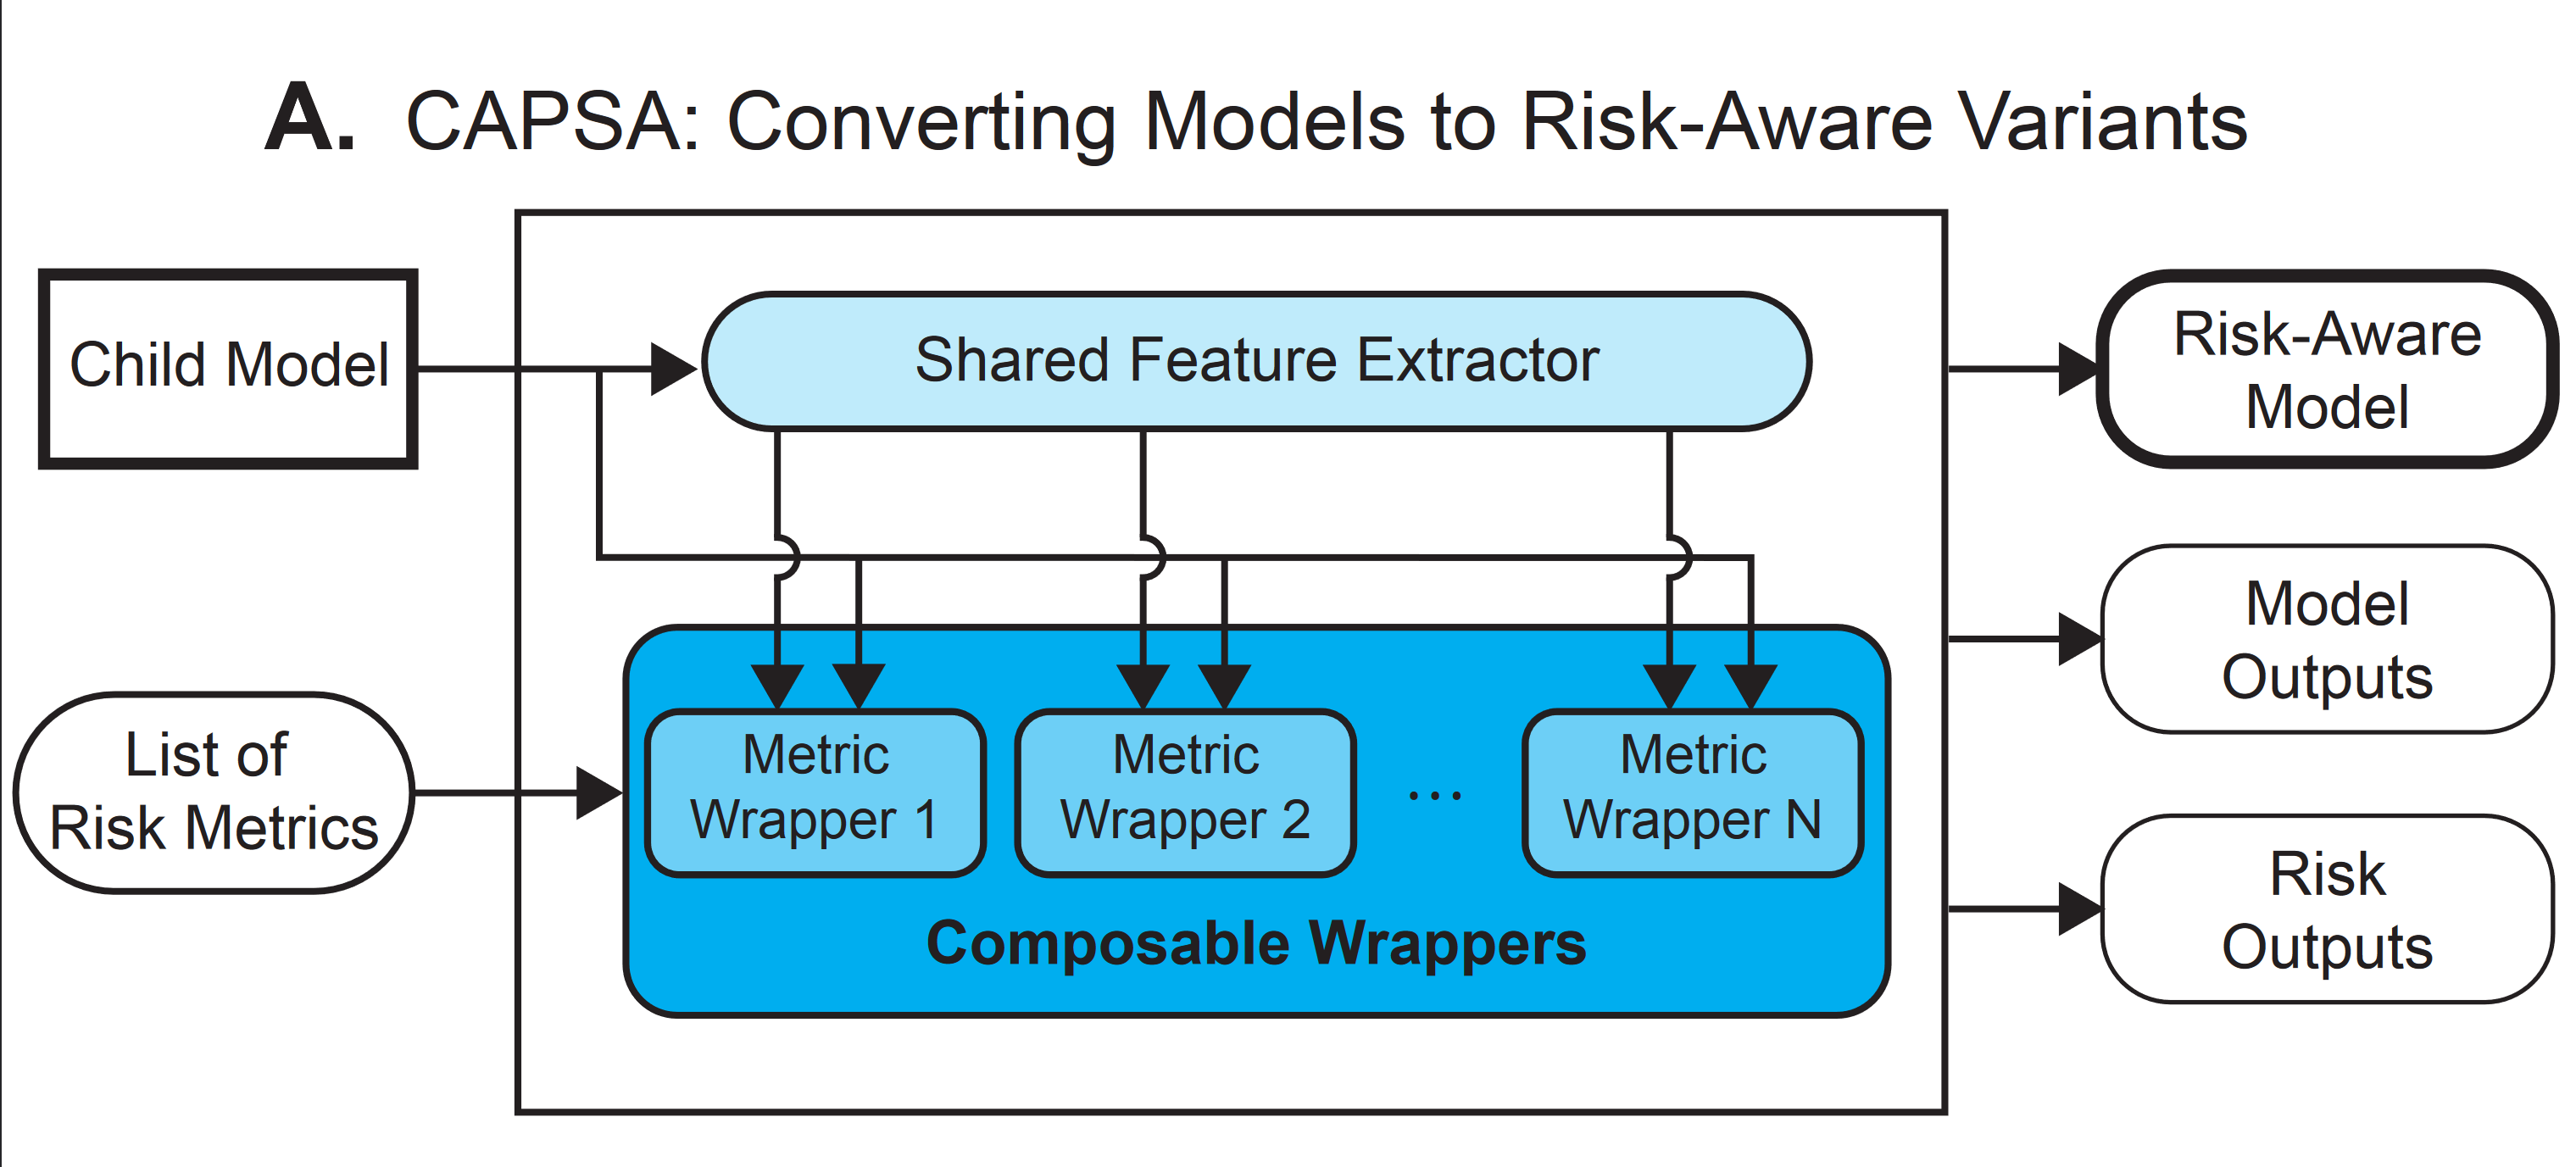
</div>
</center>

1. You would start by importing all the necessary libraries that you'd be importing in your normal workflow.

In [1]:
import tensorflow as tf
from helper import * 

2. You would have your own training and test dataset ready.

In [2]:
(x_train, y_train), (x_test, y_test) = generate_moon_data_classification()

3. You might want to visualize your own dataset to get a better understanding of your own data. So you plot your training dataset into a graph.

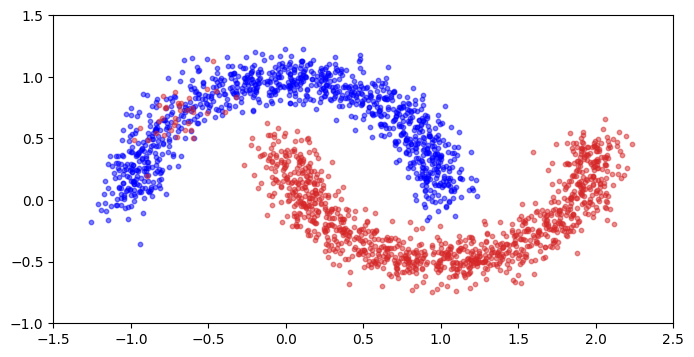

In [3]:
plot_for_moons(x_train, y_train)

4. Just like in your normal workflow, you'd have your own pre-defined model.

In [4]:
user_model = generate_model_mve_classification()

5. You import **CAPSA**'s MVEWrapper() class. This class help wrap your model model to be risk-aware towards aleatoric uncertainty. You only need to pass a predefined model. 

- <span style="color:yellow">**Aleatoric**</span> (Aleatoric Uncertainty): Aleatoric captures the noise in the data: mislabeled datapoints, ambigious labels, classes with low seperation, etc.

In [5]:
from capsa import MVEWrapper

6. You wrap your model with the MVEWrapper by simply passing your model as a parameter

In [6]:
wrapped_model = MVEWrapper(user_model)

7. You compile your model just like how you would compile any other normal Keras model. 

In [7]:
wrapped_model.compile(
            optimizer=tf.keras.optimizers.Adam(),
            loss=tf.keras.losses.BinaryCrossentropy(),
            metrics=[tf.keras.metrics.BinaryAccuracy()]
                     )

8. You fit your model with data

In [8]:
wrapped_model.fit(x_train,tf.one_hot(y_train,2),epochs=30)

Epoch 1/30
(None, 2)
(None, 2)
1313/1313 [==============================] - 5s 3ms/step - mve_loss: 0.5265 - mve_binary_accuracy: 0.7158
Epoch 2/30
1313/1313 [==============================] - 3s 3ms/step - mve_loss: 0.1346 - mve_binary_accuracy: 0.9595
Epoch 3/30
1313/1313 [==============================] - 4s 3ms/step - mve_loss: 0.0664 - mve_binary_accuracy: 0.9773
Epoch 4/30
1313/1313 [==============================] - 3s 3ms/step - mve_loss: 0.0627 - mve_binary_accuracy: 0.9773
Epoch 5/30
1313/1313 [==============================] - 3s 3ms/step - mve_loss: 0.0652 - mve_binary_accuracy: 0.9760
Epoch 6/30
1313/1313 [==============================] - 3s 3ms/step - mve_loss: 0.0654 - mve_binary_accuracy: 0.9757
Epoch 7/30
1313/1313 [==============================] - 3s 3ms/step - mve_loss: 0.0628 - mve_binary_accuracy: 0.9768
Epoch 8/30
1313/1313 [==============================] - 3s 2ms/step - mve_loss: 0.0604 - mve_binary_accuracy: 0.9774
Epoch 9/30
1313/1313 [======================

9. Now we can 

In [9]:
mesh_grid = get_grid()
output = wrapped_model(mesh_grid)

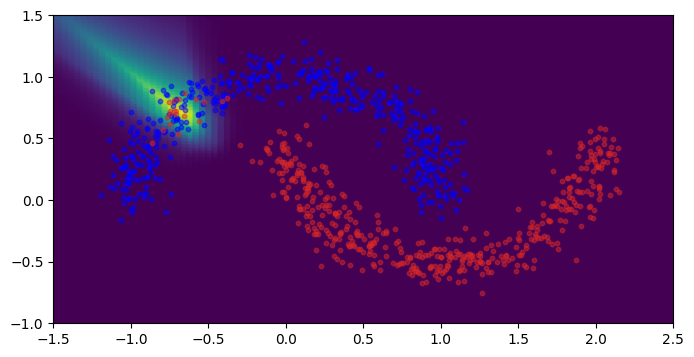

In [10]:
plot_mve_classification(output,mesh_grid,x_test,y_test)